## Course Contents
<ul>
<li>introducing scikit-learn
<li>preprocessing
<li>metrics
<li>meta-estimators
<li>human-learn
</ul>

### introducing scikit-learn

In [2]:
from sklearn.datasets import load_boston

In [4]:
X, y = load_boston(return_X_y = True)

In [5]:
from sklearn.neighbors import KNeighborsRegressor

In [6]:
mod = KNeighborsRegressor(n_neighbors = 5)

In [7]:
mod.fit(X, y)

KNeighborsRegressor()

In [9]:
pred = mod.predict(X)

In [11]:
from matplotlib import pyplot as plt

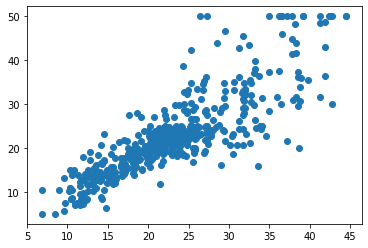

In [12]:
plt.scatter(pred, y)

### preprocessing

#### Scaling

<img src = "scaling.png">

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
from sklearn.pipeline import Pipeline

In [15]:
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('knn', KNeighborsRegressor(n_neighbors = 5))])

In [16]:
pipe.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])

In [17]:
pred = pipe.predict(X)

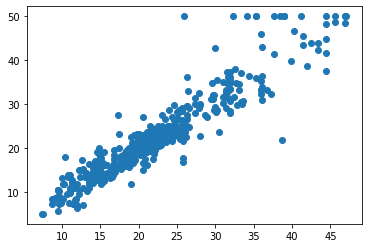

In [18]:
plt.scatter(pred, y)

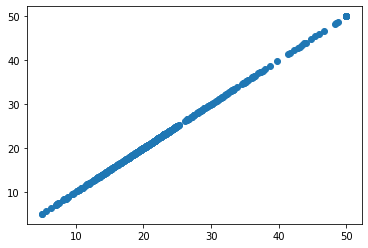

In [20]:
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('knn', KNeighborsRegressor(n_neighbors = 1))])

pipe.fit(X, y)

pred = pipe.predict(X)

plt.scatter(pred, y)

#### GridSearchCV

<img src = "split_train_test.png">

<img src = "gridsearchCV.png">

In [21]:
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('knn', KNeighborsRegressor(n_neighbors = 1))])

pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsRegressor(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
mod = GridSearchCV(estimator=pipe,
                   param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
                   cv= 3)

In [24]:
mod.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsRegressor(n_neighbors=1))]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [26]:
import pandas as pd

C:\Users\vijay\anaconda3\envs\data_science\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [27]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003326,4.700801e-04,0.003988,0.000001,1,{'knn__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.002992,4.899036e-07,0.004322,0.000940,2,{'knn__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.003990,1.411414e-03,0.003989,0.001412,3,{'knn__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.002988,8.146991e-04,0.003990,0.000814,4,{'knn__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.003989,1.409616e-03,0.005651,0.002349,5,{'knn__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.004406,1.825235e-03,0.004654,0.000470,6,{'knn__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.003325,4.708646e-04,0.004657,0.000473,7,{'knn__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.003657,4.710332e-04,0.004655,0.000470,8,{'knn__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.003988,8.139080e-04,0.006981,0.002155,9,{'knn__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.003989,8.136148e-04,0.005319,0.000940,10,{'knn__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4


#### outliers

<img src = "outliers.png">

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [48]:
df = pd.read_csv("drawndata1.csv")

In [49]:
df.head(3)

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a


In [50]:
X = df[['x', 'y']].values
y = df['z'] == "a"

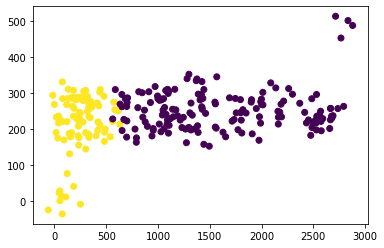

In [51]:
plt.scatter(X[:, 0], X[:, 1], c=y);

In [52]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline 

In [53]:
def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

Applying Scaler

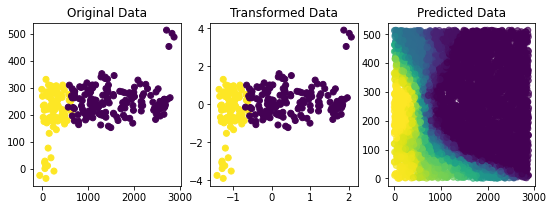

In [54]:
plot_output(scaler=StandardScaler())

After QuantileTransformer

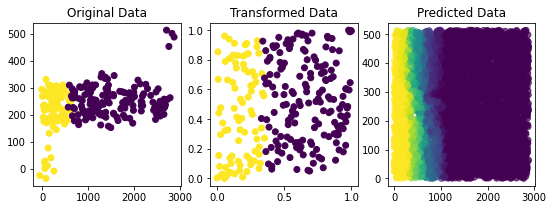

In [55]:
plot_output(scaler=QuantileTransformer(n_quantiles=100))

#### polynomial features

##### before preprocessing

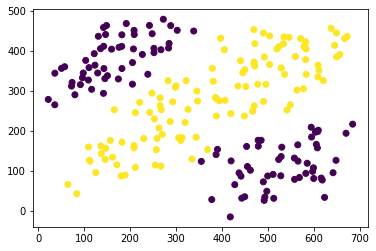

In [56]:
df = pd.read_csv("drawndata2.csv")
X = df[['x', 'y']].values
y = df['z'] == 'a'
plt.scatter(X[:, 0], X[:, 1], c=y);

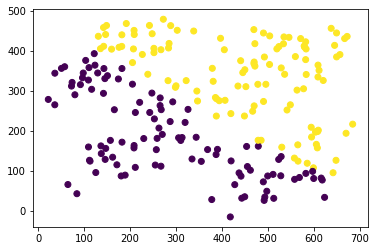

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)

##### after preprocessing

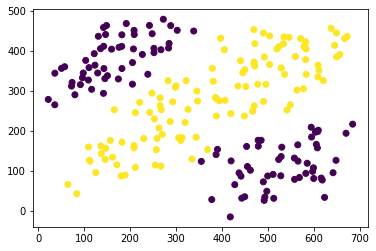

In [58]:
pipe = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)

#### one hot encoding

In [59]:
import numpy as np

In [60]:
arr = np.array(["low", "medium", "high", "low", "medium", "high", "low", "medium", "high", "low"]).reshape(-1, 1)
arr

array([['low'],
       ['medium'],
       ['high'],
       ['low'],
       ['medium'],
       ['high'],
       ['low'],
       ['medium'],
       ['high'],
       ['low']], dtype='<U6')

In [61]:
from sklearn.preprocessing import OneHotEncoder

In [62]:
enc = OneHotEncoder(sparse=False, handle_unknown="ignore")

In [63]:
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [64]:
enc.transform([["zero"]])

array([[0., 0., 0.]])

### metrics

##### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

##### Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [91]:
df = pd.read_csv("creditcard.csv")[:80000]

In [92]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [93]:
X = df[df.columns[1:29]].values

In [94]:
X

array([[-1.35980713, -0.07278117,  2.53634674, ..., -0.18911484,
         0.13355838, -0.02105305],
       [ 1.19185711,  0.26615071,  0.16648011, ...,  0.12589453,
        -0.0089831 ,  0.01472417],
       [-1.35835406, -1.34016307,  1.77320934, ..., -0.13909657,
        -0.05535279, -0.05975184],
       ...,
       [-2.28727012,  1.12156794,  1.16358497, ..., -0.2520452 ,
        -0.40904438, -0.25311435],
       [-1.3509413 ,  0.23341085,  0.95082419, ..., -0.27339173,
         0.35042154,  0.14085102],
       [-2.00700424,  0.73613717,  0.05184662, ..., -0.96230381,
        -0.95055099, -0.59174836]])

In [95]:
y = df['Class'].values

In [96]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [97]:
X.shape

(80000, 28)

In [98]:
y.shape

(80000,)

In [101]:
f"Fraud cases = {y.sum()}"

'Fraud cases = 196'

In [99]:
from sklearn.linear_model import LogisticRegression

In [103]:
mod = LogisticRegression(class_weight= {0: 1, 1: 2}, max_iter= 1000)
mod.fit(X, y).predict(X).sum()

171

In [104]:
from sklearn.model_selection import GridSearchCV

In [108]:
grid = GridSearchCV(estimator = LogisticRegression(max_iter = 1000),
                    param_grid = {'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}]},
                    cv = 4,
                    n_jobs = -1)

In [109]:
grid.fit(X, y)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 4}]})

In [110]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,1.465331,0.299525,0.005486,0.000863,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.99405,0.99835,0.99945,0.99780,0.997413,0.002030,1
1,1.431422,0.314733,0.005984,0.001725,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.99025,0.99840,0.99960,0.99805,0.996575,0.003697,2
2,1.491510,0.397586,0.004736,0.000430,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.98730,0.99845,0.99960,0.99815,0.995875,0.004980,3
3,1.469820,0.268736,0.004240,0.000829,"{0: 1, 1: 4}","{'class_weight': {0: 1, 1: 4}}",0.98475,0.99850,0.99960,0.99820,0.995262,0.006092,4


##### precision and recall

In [115]:
from sklearn.metrics import precision_score, recall_score, make_scorer

In [112]:
precision_score(y, grid.predict(X))

0.7682119205298014

In [113]:
recall_score(y, grid.predict(X))

0.5918367346938775

In [119]:
grid = GridSearchCV(estimator = LogisticRegression(max_iter = 1000),
                    param_grid = {'class_weight': [{0:1, 1:v} for v in np.linspace(1, 20, 40)]},
                    scoring={'precision':  make_scorer(precision_score), 'recall': make_scorer(recall_score)},
                    refit='precision',
                    return_train_score=True,
                    cv = 10,
                    n_jobs = -1)
grid.fit(X, y)
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split2_train_recall,split3_train_recall,split4_train_recall,split5_train_recall,split6_train_recall,split7_train_recall,split8_train_recall,split9_train_recall,mean_train_recall,std_train_recall
0,2.354630,0.531906,0.019460,0.018813,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",1.000000,0.463415,0.583333,1.000000,...,0.627119,0.548023,0.573864,0.573864,0.562500,0.613636,0.636364,0.607955,0.612185,0.054733
1,2.324591,0.270306,0.013505,0.003084,"{0: 1, 1: 1.4871794871794872}","{'class_weight': {0: 1, 1: 1.4871794871794872}}",1.000000,0.463415,0.583333,1.000000,...,0.666667,0.610169,0.653409,0.636364,0.619318,0.664773,0.693182,0.676136,0.667200,0.049330
2,2.271358,0.349569,0.017899,0.014638,"{0: 1, 1: 1.9743589743589745}","{'class_weight': {0: 1, 1: 1.9743589743589745}}",1.000000,0.463415,0.583333,1.000000,...,0.711864,0.644068,0.704545,0.681818,0.659091,0.698864,0.715909,0.698864,0.702915,0.047713
3,2.344176,0.259965,0.011878,0.002866,"{0: 1, 1: 2.4615384615384617}","{'class_weight': {0: 1, 1: 2.4615384615384617}}",1.000000,0.463415,0.583333,1.000000,...,0.745763,0.694915,0.727273,0.710227,0.698864,0.732955,0.761364,0.732955,0.734669,0.041228
4,1.896130,0.154394,0.010872,0.001134,"{0: 1, 1: 2.948717948717949}","{'class_weight': {0: 1, 1: 2.948717948717949}}",1.000000,0.452381,0.583333,1.000000,...,0.785311,0.706215,0.744318,0.732955,0.715909,0.755682,0.772727,0.738636,0.749978,0.039589
5,1.891540,0.163891,0.011670,0.001483,"{0: 1, 1: 3.4358974358974357}","{'class_weight': {0: 1, 1: 3.4358974358974357}}",1.000000,0.452381,0.583333,1.000000,...,0.813559,0.728814,0.750000,0.744318,0.727273,0.772727,0.784091,0.744318,0.765267,0.035867
6,2.039745,0.260000,0.012665,0.003340,"{0: 1, 1: 3.923076923076923}","{'class_weight': {0: 1, 1: 3.923076923076923}}",1.000000,0.452381,0.583333,1.000000,...,0.836158,0.745763,0.772727,0.761364,0.750000,0.778409,0.795455,0.772727,0.781147,0.035248
7,1.979007,0.211609,0.011968,0.003540,"{0: 1, 1: 4.410256410256411}","{'class_weight': {0: 1, 1: 4.410256410256411}}",1.000000,0.452381,0.583333,1.000000,...,0.841808,0.779661,0.784091,0.806818,0.784091,0.789773,0.806818,0.772727,0.799291,0.026646
8,1.824920,0.214604,0.011769,0.003646,"{0: 1, 1: 4.897435897435898}","{'class_weight': {0: 1, 1: 4.897435897435898}}",1.000000,0.452381,0.583333,1.000000,...,0.847458,0.796610,0.789773,0.818182,0.795455,0.801136,0.818182,0.789773,0.811194,0.021745
9,1.909693,0.141330,0.013165,0.003241,"{0: 1, 1: 5.384615384615384}","{'class_weight': {0: 1, 1: 5.384615384615384}}",1.000000,0.452381,0.583333,1.000000,...,0.847458,0.807910,0.823864,0.829545,0.806818,0.806818,0.829545,0.806818,0.823109,0.017508


Text(0, 0.5, 'Score')

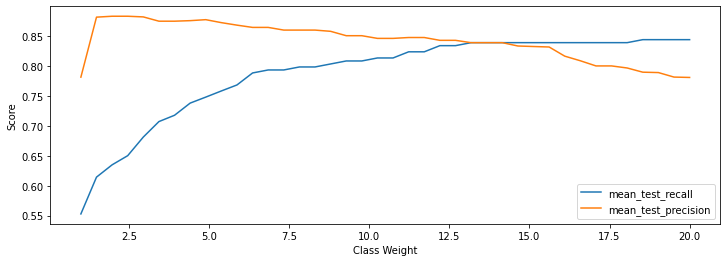

In [120]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot([_[1] for _ in df_results['param_class_weight']], 
             df_results[score], 
             label=score)
plt.legend()
plt.xlabel("Class Weight")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

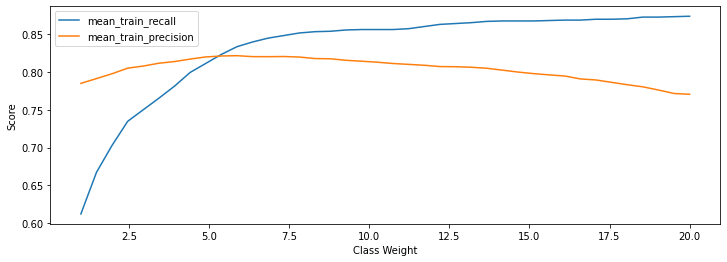

In [121]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_train_recall', 'mean_train_precision']:
    plt.plot([_[1] for _ in df_results['param_class_weight']], 
             df_results[score], 
             label=score)
plt.legend()
plt.xlabel("Class Weight")
plt.ylabel("Score")

In [123]:
def min_recall_precision(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

grid = GridSearchCV(estimator = LogisticRegression(max_iter = 1000),
                    param_grid = {'class_weight': [{0:1, 1:v} for v in np.linspace(1, 20, 40)]},
                    scoring={'precision':  make_scorer(precision_score), 
                             'recall': make_scorer(recall_score),
                             'min_recall_precision': make_scorer(min_recall_precision)},
                    refit='precision',
                    return_train_score=True,
                    cv = 10,
                    n_jobs = -1)
grid.fit(X, y)
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split2_train_min_recall_precision,split3_train_min_recall_precision,split4_train_min_recall_precision,split5_train_min_recall_precision,split6_train_min_recall_precision,split7_train_min_recall_precision,split8_train_min_recall_precision,split9_train_min_recall_precision,mean_train_min_recall_precision,std_train_min_recall_precision
0,2.005539,0.253657,0.020347,0.002149,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",1.000000,0.463415,0.583333,1.000000,...,0.627119,0.548023,0.573864,0.573864,0.562500,0.613636,0.636364,0.607955,0.612185,0.054733
1,1.838883,0.232880,0.020946,0.002359,"{0: 1, 1: 1.4871794871794872}","{'class_weight': {0: 1, 1: 1.4871794871794872}}",1.000000,0.463415,0.583333,1.000000,...,0.666667,0.610169,0.653409,0.636364,0.619318,0.664773,0.693182,0.676136,0.667200,0.049330
2,2.258960,0.526201,0.021143,0.005423,"{0: 1, 1: 1.9743589743589745}","{'class_weight': {0: 1, 1: 1.9743589743589745}}",1.000000,0.463415,0.583333,1.000000,...,0.711864,0.644068,0.704545,0.681818,0.659091,0.698864,0.715909,0.698864,0.702915,0.047713
3,2.247122,0.173731,0.027204,0.010179,"{0: 1, 1: 2.4615384615384617}","{'class_weight': {0: 1, 1: 2.4615384615384617}}",1.000000,0.463415,0.583333,1.000000,...,0.745763,0.694915,0.727273,0.710227,0.698864,0.732955,0.761364,0.732955,0.734669,0.041228
4,1.964949,0.286353,0.022584,0.002655,"{0: 1, 1: 2.948717948717949}","{'class_weight': {0: 1, 1: 2.948717948717949}}",1.000000,0.452381,0.583333,1.000000,...,0.785311,0.706215,0.744318,0.732955,0.715909,0.755682,0.772727,0.738636,0.749978,0.039589
5,2.028891,0.311806,0.022902,0.004814,"{0: 1, 1: 3.4358974358974357}","{'class_weight': {0: 1, 1: 3.4358974358974357}}",1.000000,0.452381,0.583333,1.000000,...,0.813559,0.728814,0.750000,0.744318,0.727273,0.772727,0.784091,0.744318,0.765267,0.035867
6,2.069091,0.315962,0.023319,0.006568,"{0: 1, 1: 3.923076923076923}","{'class_weight': {0: 1, 1: 3.923076923076923}}",1.000000,0.452381,0.583333,1.000000,...,0.836158,0.745763,0.772727,0.761364,0.750000,0.778409,0.795455,0.772727,0.781147,0.035248
7,2.218287,0.403966,0.027302,0.011796,"{0: 1, 1: 4.410256410256411}","{'class_weight': {0: 1, 1: 4.410256410256411}}",1.000000,0.452381,0.583333,1.000000,...,0.841808,0.779661,0.784091,0.806818,0.784091,0.789773,0.802260,0.772727,0.798835,0.026552
8,2.222379,0.244521,0.032704,0.015129,"{0: 1, 1: 4.897435897435898}","{'class_weight': {0: 1, 1: 4.897435897435898}}",1.000000,0.452381,0.583333,1.000000,...,0.847458,0.796610,0.789773,0.813559,0.795455,0.801136,0.804469,0.789773,0.809360,0.021559
9,1.906103,0.224491,0.024426,0.002719,"{0: 1, 1: 5.384615384615384}","{'class_weight': {0: 1, 1: 5.384615384615384}}",1.000000,0.452381,0.583333,1.000000,...,0.847458,0.803371,0.801105,0.815642,0.802260,0.806818,0.806630,0.802260,0.814877,0.019670


Text(0, 0.5, 'Score')

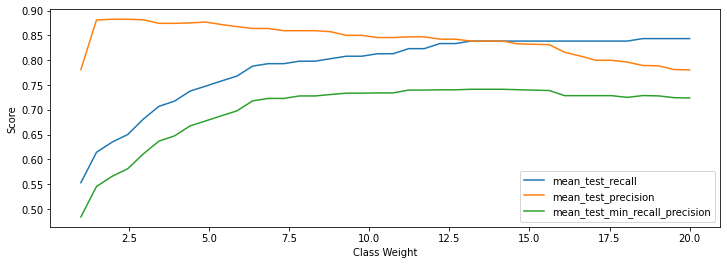

In [126]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision', 'mean_test_min_recall_precision']:
    plt.plot([_[1] for _ in df_results['param_class_weight']], 
             df_results[score], 
             label=score)
plt.legend()
plt.xlabel("Class Weight")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

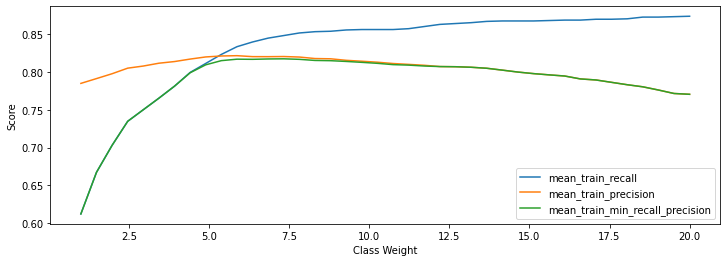

In [127]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_train_recall', 'mean_train_precision', 'mean_train_min_recall_precision']:
    plt.plot([_[1] for _ in df_results['param_class_weight']], 
             df_results[score], 
             label=score)
plt.legend()
plt.xlabel("Class Weight")
plt.ylabel("Score")

In [129]:
def min_recall_precision(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

grid = GridSearchCV(estimator = LogisticRegression(max_iter = 1000),
                    param_grid = {'class_weight': [{0:1, 1:v} for v in np.linspace(1, 20, 40)]},
                    scoring={'precision':  make_scorer(precision_score), 
                             'recall': make_scorer(recall_score),
                             'min_recall_precision': make_scorer(min_recall_precision)},
                    refit='precision',
                    return_train_score=True,
                    cv = 10,
                    n_jobs = -1)
grid.fit(X, y, sample_weight=np.log(1 + df['Amount']))
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split2_train_min_recall_precision,split3_train_min_recall_precision,split4_train_min_recall_precision,split5_train_min_recall_precision,split6_train_min_recall_precision,split7_train_min_recall_precision,split8_train_min_recall_precision,split9_train_min_recall_precision,mean_train_min_recall_precision,std_train_min_recall_precision
0,2.987013,0.383203,0.026232,0.013647,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",0.000000,0.463415,0.583333,1.000000,...,0.604520,0.564972,0.602273,0.556818,0.568182,0.630682,0.630682,0.613636,0.611075,0.045157
1,3.294990,0.623263,0.031316,0.012758,"{0: 1, 1: 1.4871794871794872}","{'class_weight': {0: 1, 1: 1.4871794871794872}}",1.000000,0.463415,0.583333,1.000000,...,0.632768,0.593220,0.625000,0.590909,0.585227,0.636364,0.664773,0.636364,0.642225,0.063706
2,3.195569,0.848007,0.029694,0.013516,"{0: 1, 1: 1.9743589743589745}","{'class_weight': {0: 1, 1: 1.9743589743589745}}",1.000000,0.463415,0.583333,1.000000,...,0.677966,0.604520,0.642045,0.613636,0.602273,0.653409,0.681818,0.647727,0.660927,0.064034
3,2.527378,0.518745,0.026752,0.006412,"{0: 1, 1: 2.4615384615384617}","{'class_weight': {0: 1, 1: 2.4615384615384617}}",1.000000,0.463415,0.583333,1.000000,...,0.711864,0.627119,0.653409,0.630682,0.630682,0.659091,0.681818,0.664773,0.676791,0.060260
4,2.773321,0.177489,0.029596,0.004732,"{0: 1, 1: 2.948717948717949}","{'class_weight': {0: 1, 1: 2.948717948717949}}",1.000000,0.463415,0.538462,1.000000,...,0.757062,0.655367,0.704545,0.676136,0.659091,0.676136,0.721591,0.670455,0.707971,0.056803
5,2.627849,0.649358,0.030284,0.007845,"{0: 1, 1: 3.4358974358974357}","{'class_weight': {0: 1, 1: 3.4358974358974357}}",1.000000,0.463415,0.538462,1.000000,...,0.785311,0.694915,0.721591,0.698864,0.693182,0.721591,0.744318,0.710227,0.734627,0.048860
6,2.842781,0.582320,0.021364,0.003715,"{0: 1, 1: 3.923076923076923}","{'class_weight': {0: 1, 1: 3.923076923076923}}",1.000000,0.463415,0.538462,1.000000,...,0.807910,0.734463,0.750000,0.738636,0.727273,0.755682,0.778409,0.732955,0.762420,0.039691
7,2.114767,0.347503,0.022699,0.006279,"{0: 1, 1: 4.410256410256411}","{'class_weight': {0: 1, 1: 4.410256410256411}}",1.000000,0.463415,0.538462,1.000000,...,0.819209,0.745763,0.778409,0.767045,0.755682,0.767045,0.787709,0.750000,0.780363,0.032918
8,2.205326,0.225495,0.022441,0.004214,"{0: 1, 1: 4.897435897435898}","{'class_weight': {0: 1, 1: 4.897435897435898}}",1.000000,0.463415,0.538462,1.000000,...,0.830508,0.774011,0.795455,0.789773,0.778409,0.784091,0.788889,0.755682,0.794209,0.027995
9,2.387018,0.549420,0.025234,0.007753,"{0: 1, 1: 5.384615384615384}","{'class_weight': {0: 1, 1: 5.384615384615384}}",1.000000,0.463415,0.538462,1.000000,...,0.837079,0.790960,0.797753,0.798883,0.782123,0.797753,0.792350,0.778409,0.802527,0.024037


Text(0, 0.5, 'Score')

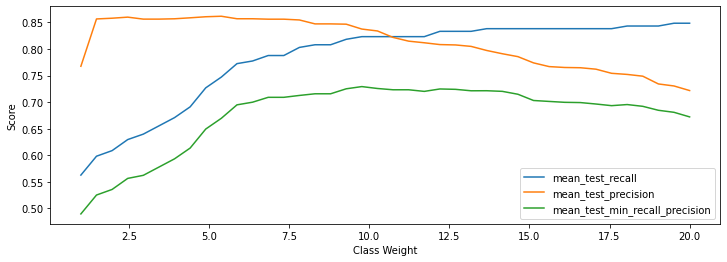

In [132]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision', 'mean_test_min_recall_precision']:
    plt.plot([_[1] for _ in df_results['param_class_weight']], 
             df_results[score], 
             label=score)
plt.legend()
plt.xlabel("Class Weight")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

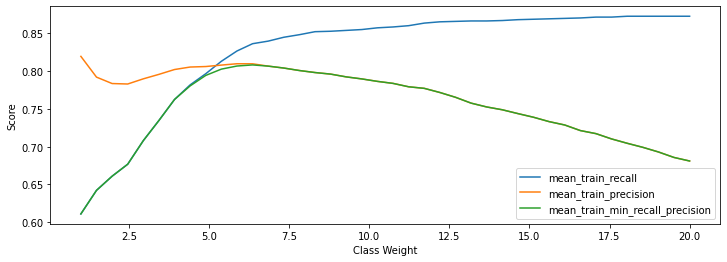

In [133]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_train_recall', 'mean_train_precision', 'mean_train_min_recall_precision']:
    plt.plot([_[1] for _ in df_results['param_class_weight']], 
             df_results[score], 
             label=score)
plt.legend()
plt.xlabel("Class Weight")
plt.ylabel("Score")

##### outlier detection

In [136]:
from sklearn.ensemble import IsolationForest

In [137]:
mod = IsolationForest()
mod.fit(X)
mod.predict(X)

array([1, 1, 1, ..., 1, 1, 1])

In [138]:
from collections import Counter

In [139]:
Counter(mod.predict(X))

Counter({1: 76832, -1: 3168})

In [140]:
np.where(mod.predict(X) == -1, 1, 0)

array([0, 0, 0, ..., 0, 0, 0])

In [141]:
def outlier_precision(mod, X, y):
    preds = mod.predict(X)
    return precision_score(y, np.where(preds == -1, 1, 0))

def outlier_recall(mod, X, y):
    preds = mod.predict(X)
    return recall_score(y, np.where(preds == -1, 1, 0))

grid = GridSearchCV(
    estimator=IsolationForest(),
    param_grid={'contamination': np.linspace(0.001, 0.02, 10)},
    scoring={'precision': outlier_precision, 
             'recall': outlier_recall},
    refit='precision',
    cv=5,
    n_jobs=-1
)
grid.fit(X, y)

GridSearchCV(cv=5, estimator=IsolationForest(), n_jobs=-1,
             param_grid={'contamination': array([0.001     , 0.00311111, 0.00522222, 0.00733333, 0.00944444,
       0.01155556, 0.01366667, 0.01577778, 0.01788889, 0.02      ])},
             refit='precision',
             scoring={'precision': <function outlier_precision at 0x000001F759C54598>,
                      'recall': <function outlier_recall at 0x000001F759C54268>})

Text(0, 0.5, 'Score')

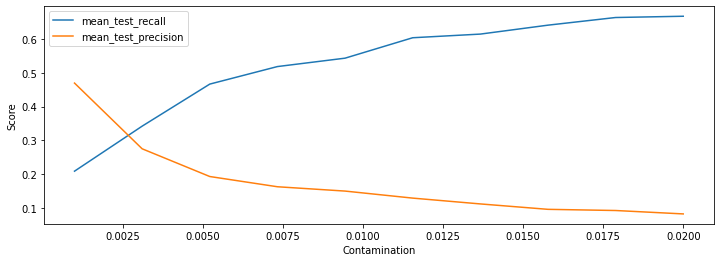

In [142]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot(df_results['param_contamination'], 
             df_results[score], 
             label=score)
plt.legend()
plt.xlabel("Contamination")
plt.ylabel("Score")

### meta-estimators

<img src = "meta_estimators.png">

##### VotingClassifier

In [144]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification

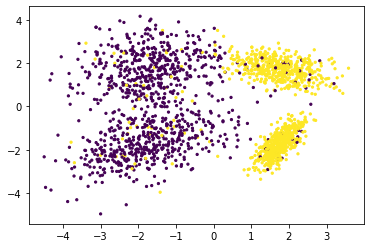

In [145]:
X, y = make_classification(n_samples=2000, n_features=2,
                           n_redundant=0, random_state=21,
                           class_sep=1.75, flip_y=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=5)

In [146]:
def make_plots():
    X_new = np.concatenate([
        np.random.uniform(np.min(X[:, 0]), np.max(X[:, 0]), (20000, 1)),
        np.random.uniform(np.min(X[:, 1]), np.max(X[:, 1]), (20000, 1))
    ], axis=1)
    plt.figure(figsize=(16, 4))
    plt.subplot(141)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
    plt.title("original data")
    plt.subplot(142)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf1.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens1")
    plt.subplot(143)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf2.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens2")
    plt.subplot(144)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf3.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens3")

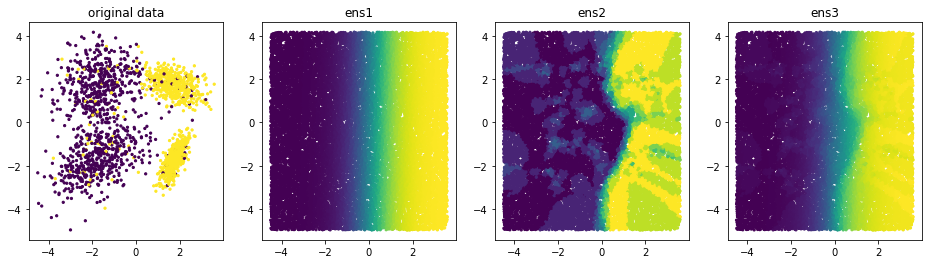

In [147]:
clf1 = LogisticRegression().fit(X, y)
clf2 = KNeighborsClassifier(n_neighbors=10).fit(X, y)
clf3 = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2)],
                        voting='soft',
                        weights=[10.5, 2.5])
clf3.fit(X, y)

make_plots()

##### ThresholdClassifier

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn.pipeline import Pipeline
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer

from sklego.meta import Thresholder

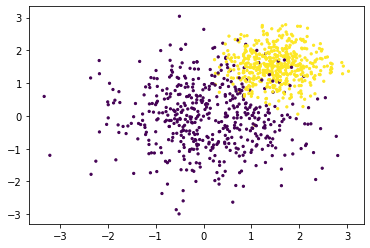

In [150]:
X, y = make_blobs(1000, centers=[(0, 0), (1.5, 1.5)], cluster_std=[1, 0.5])
plt.scatter(X[:, 0], X[:, 1], c=y, s=5)

In [151]:
m1 = Thresholder(LogisticRegression(solver='lbfgs'), threshold=0.1).fit(X, y)
m2 = Thresholder(LogisticRegression(solver='lbfgs'), threshold=0.9).fit(X, y)


Text(0.5, 1.0, 'threshold=0.9')

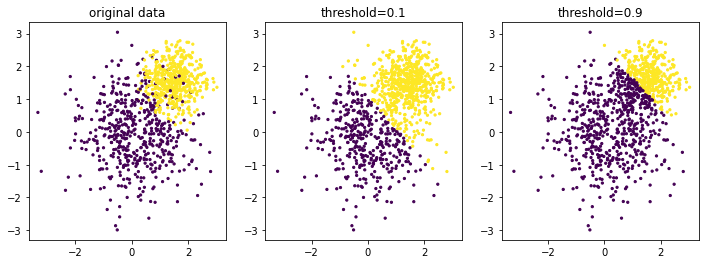

In [152]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
plt.title("original data")
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=m1.predict(X), s=5)
plt.title("threshold=0.1")
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=m2.predict(X), s=5)
plt.title("threshold=0.9")

In [160]:
pipe = Pipeline([
    ("model", Thresholder(LogisticRegression(solver='lbfgs'), threshold=0.1))
])

grid = GridSearchCV(estimator=pipe,
                  param_grid = {"model__threshold": np.linspace(0.1, 0.9, 50)},
                  scoring={"precision": make_scorer(precision_score),
                            "recall": make_scorer(recall_score),
                            "accuracy": make_scorer(accuracy_score)},
                  refit="precision",
                  return_train_score=True,
                  cv=5)

grid.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        Thresholder(model=LogisticRegression(),
                                                    threshold=0.1))]),
             param_grid={'model__threshold': array([0.1       , 0.11632653, 0.13265306, 0.14897959, 0.16530612,
       0.18163265, 0.19795918, 0.21428571, 0.23061224, 0.24693878,
       0.26326531, 0.27959184, 0.29591837, 0.3122449 , 0.32857143,
       0.34489796, 0.36122449, 0.37755102, 0.39387755, 0...
       0.58979592, 0.60612245, 0.62244898, 0.63877551, 0.65510204,
       0.67142857, 0.6877551 , 0.70408163, 0.72040816, 0.73673469,
       0.75306122, 0.76938776, 0.78571429, 0.80204082, 0.81836735,
       0.83469388, 0.85102041, 0.86734694, 0.88367347, 0.9       ])},
             refit='precision', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score),
                   

In [159]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__threshold,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,std_test_recall,rank_test_recall,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,0.013565,0.002647,0.005784,1.322803e-03,0.1,{'model__threshold': 0.1},0.811475,0.826446,0.746269,0.751880,...,0.004000,1,0.880,0.895,0.830,0.835,0.910,0.870,0.032094,46
1,0.011569,0.002570,0.005385,1.017206e-03,0.116327,{'model__threshold': 0.1163265306122449},0.830508,0.833333,0.757576,0.757576,...,0.008000,2,0.890,0.900,0.840,0.840,0.910,0.876,0.030067,44
2,0.008575,0.005445,0.002992,6.314299e-04,0.132653,{'model__threshold': 0.1326530612244898},0.830508,0.833333,0.775194,0.793651,...,0.008000,2,0.890,0.900,0.855,0.870,0.910,0.885,0.020000,41
3,0.004786,0.000746,0.002394,4.888896e-04,0.14898,{'model__threshold': 0.1489795918367347},0.837607,0.862069,0.781250,0.813008,...,0.008000,2,0.895,0.920,0.860,0.885,0.920,0.896,0.022672,38
4,0.005784,0.001162,0.002194,3.983260e-04,0.165306,{'model__threshold': 0.1653061224489796},0.844828,0.860870,0.800000,0.819672,...,0.008000,5,0.900,0.915,0.875,0.890,0.930,0.902,0.019131,36
5,0.004787,0.000399,0.002194,3.991607e-04,0.181633,{'model__threshold': 0.1816326530612245},0.852174,0.860870,0.813008,0.819672,...,0.008000,5,0.905,0.915,0.885,0.890,0.930,0.905,0.016432,34
6,0.006781,0.002222,0.002394,4.890273e-04,0.197959,{'model__threshold': 0.1979591836734694},0.852174,0.860870,0.826446,0.826446,...,0.008000,5,0.905,0.915,0.895,0.895,0.930,0.908,0.013266,33
7,0.005585,0.001017,0.002194,3.989225e-04,0.214286,{'model__threshold': 0.2142857142857143},0.859649,0.868421,0.826446,0.840336,...,0.008000,5,0.910,0.920,0.895,0.905,0.935,0.913,0.013638,30
8,0.005186,0.000399,0.001995,3.162980e-07,0.230612,{'model__threshold': 0.2306122448979592},0.867257,0.883929,0.826446,0.840336,...,0.007483,9,0.915,0.930,0.895,0.905,0.930,0.915,0.013784,28
9,0.005784,0.001162,0.002394,4.884621e-04,0.246939,{'model__threshold': 0.2469387755102041},0.875000,0.891892,0.840336,0.847458,...,0.007483,9,0.920,0.935,0.905,0.910,0.935,0.921,0.012410,21


Text(0, 0.5, 'Score')

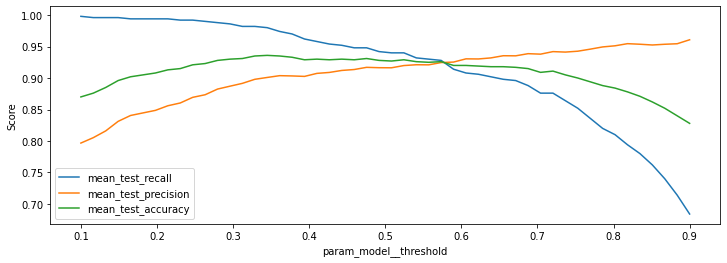

In [161]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision', 'mean_test_accuracy']:
    plt.plot(df_results['param_model__threshold'], 
             df_results[score], 
             label=score)
plt.legend()
plt.xlabel("param_model__threshold")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

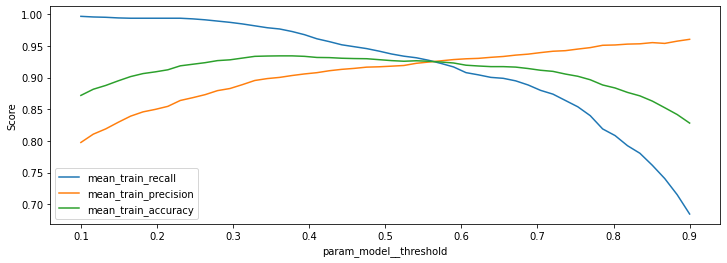

In [162]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_train_recall', 'mean_train_precision', 'mean_train_accuracy']:
    plt.plot(df_results['param_model__threshold'], 
             df_results[score], 
             label=score)
plt.legend()
plt.xlabel("param_model__threshold")
plt.ylabel("Score")

##### Grouped Model

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklego.datasets import load_chicken
from sklego.preprocessing import ColumnSelector

In [164]:
df = load_chicken(as_frame=True)

In [165]:
def plot_model(model):
    df = load_chicken(as_frame=True)
    model.fit(df[['diet', 'time']], df['weight'])
    metric_df = df[['diet', 'time', 'weight']].assign(pred=lambda d: model.predict(d[['diet', 'time']]))
    metric = mean_absolute_error(metric_df['weight'], metric_df['pred'])
    plt.figure(figsize=(12, 4))
    # plt.scatter(df['time'], df['weight'])
    for i in [1, 2, 3, 4]:
        pltr = metric_df[['time', 'diet', 'pred']].drop_duplicates().loc[lambda d: d['diet'] == i]
        plt.plot(pltr['time'], pltr['pred'], color='.rbgy'[i])
    plt.title(f"linear model per group, MAE: {np.round(metric, 2)}")

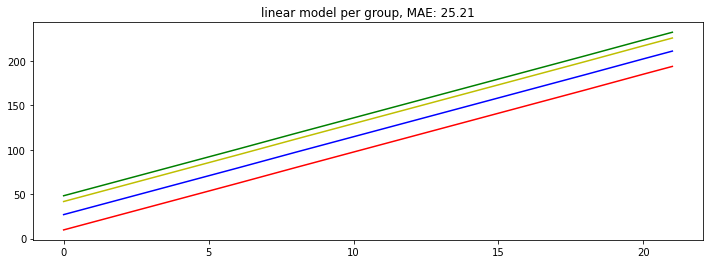

In [166]:
feature_pipeline = Pipeline([
    ("datagrab", FeatureUnion([
        ("discrete", Pipeline([
            ("grab", ColumnSelector("diet")),
            ("encode", OneHotEncoder(categories="auto", sparse=False))
        ])),
        ("continuous", Pipeline([
            ("grab", ColumnSelector("time")),
            ("standardize", StandardScaler())
        ]))
    ]))
])

pipe = Pipeline([
    ("transform", feature_pipeline),
    ("model", LinearRegression())
])

plot_model(pipe)

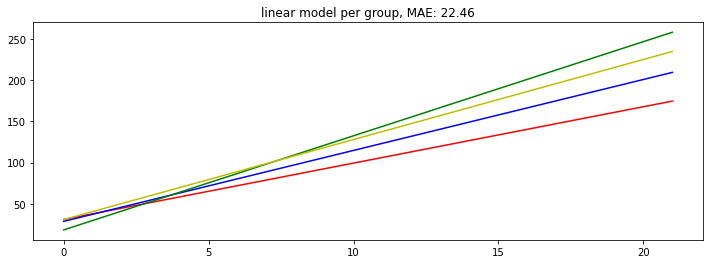

In [167]:
from sklego.meta import GroupedPredictor
mod = GroupedPredictor(LinearRegression(), groups=["diet"])
plot_model(mod)

##### time series

In [169]:
from sklearn.dummy import DummyRegressor
from sklego.meta import GroupedPredictor, DecayEstimator
from sklego.datasets import make_simpleseries
import matplotlib.pylab as plt 

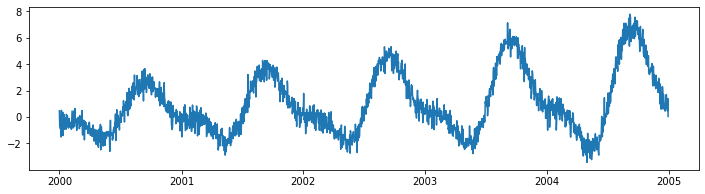

In [170]:
yt = make_simpleseries(seed=1)
dates = pd.date_range("2000-01-01", periods=len(yt))
df = (pd.DataFrame({"yt": yt,
                  "date": dates})
      .assign(m=lambda d: d.date.dt.month)
      .reset_index())

plt.figure(figsize=(12, 3))
plt.plot(dates, make_simpleseries(seed=1))

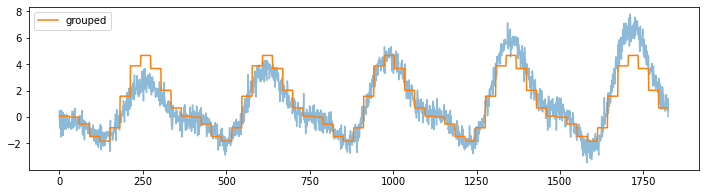

In [171]:
mod1 = (GroupedPredictor(DummyRegressor(), groups=["m"])
  .fit(df[['m']], df['yt']))

plt.figure(figsize=(12, 3))
plt.plot(df['yt'], alpha=0.5);
plt.plot(mod1.predict(df[['m']]), label="grouped")
plt.legend()

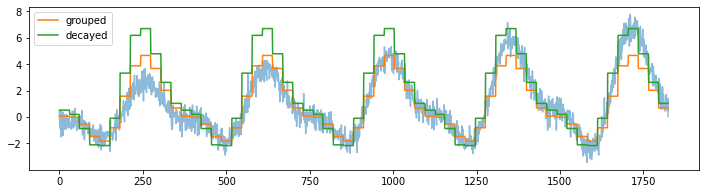

In [172]:
mod1 = (GroupedPredictor(DummyRegressor(), groups=["m"])
  .fit(df[['m']], df['yt']))

mod2 = (GroupedPredictor(DecayEstimator(DummyRegressor(), decay=0.9), groups=["m"])
        .fit(df[['index', 'm']], df['yt']))

plt.figure(figsize=(12, 3))
plt.plot(df['yt'], alpha=0.5);
plt.plot(mod1.predict(df[['m']]), label="grouped")
plt.plot(mod2.predict(df[['index', 'm']]), label="decayed")
plt.legend()